#### 散点图

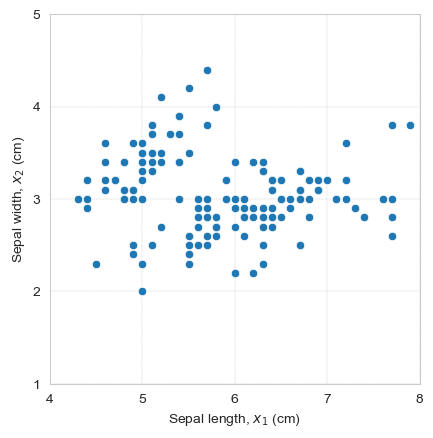

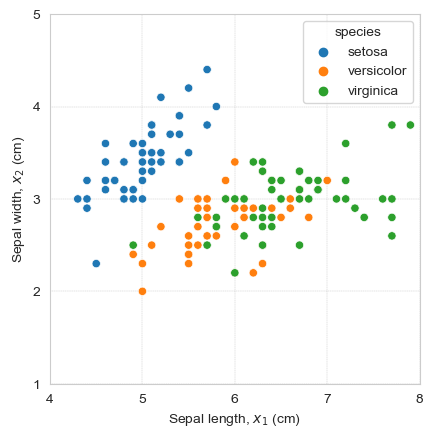

In [15]:
# Bk3_Ch21_1_A

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris data
iris_sns = sns.load_dataset("iris")

fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="sepal_width")

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7, 0.7, 0.7])
ax.set_xbound(lower=4, upper=8)
ax.set_ybound(lower=1, upper=5)

fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species")

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7, 0.7, 0.7])
ax.set_xbound(lower=4, upper=8)
ax.set_ybound(lower=1, upper=5)


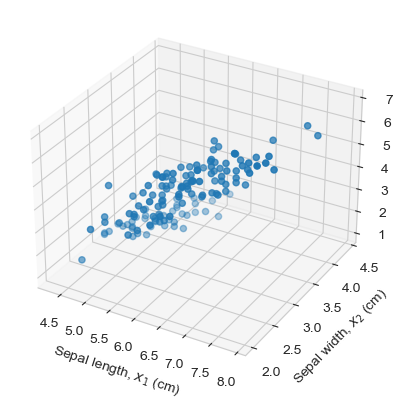

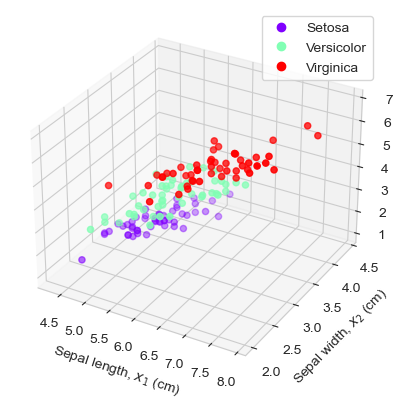

In [12]:
x1 = iris_sns['sepal_length']
x2 = iris_sns['sepal_width']
x3 = iris_sns['petal_length']
labels = iris_sns['species'].copy()
labels[labels == 'setosa'] = 1
labels[labels == 'versicolor'] = 2
labels[labels == 'virginica'] = 3
rainbow = plt.get_cmap("rainbow")

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter(x1, x2, x3)

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_zlabel('Petal length, $x_3$ (cm)')
plt.show()
# ax.set_proj_type('ortho')
ax.view_init(azim=-135, elev=30)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
scatter_h = ax.scatter(x1, x2, x3, c=labels, cmap=rainbow)

classes = ['Setosa', 'Versicolor', 'Virginica']
# 创建图例
plt.legend(handles=scatter_h.legend_elements()[0], labels=classes)
ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_zlabel('Petal length, $x_3$ (cm)')
plt.show()
# ax.set_proj_type('ortho')
ax.view_init(azim=-135, elev=30)


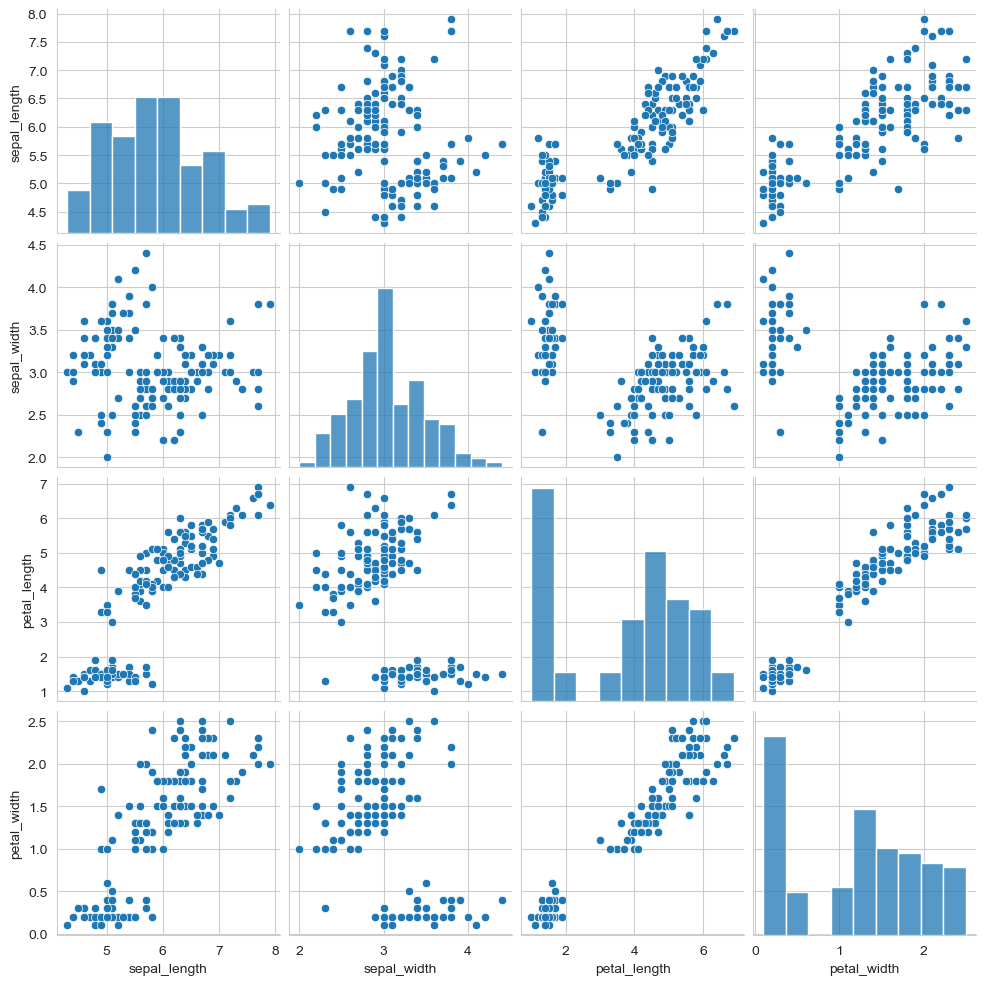

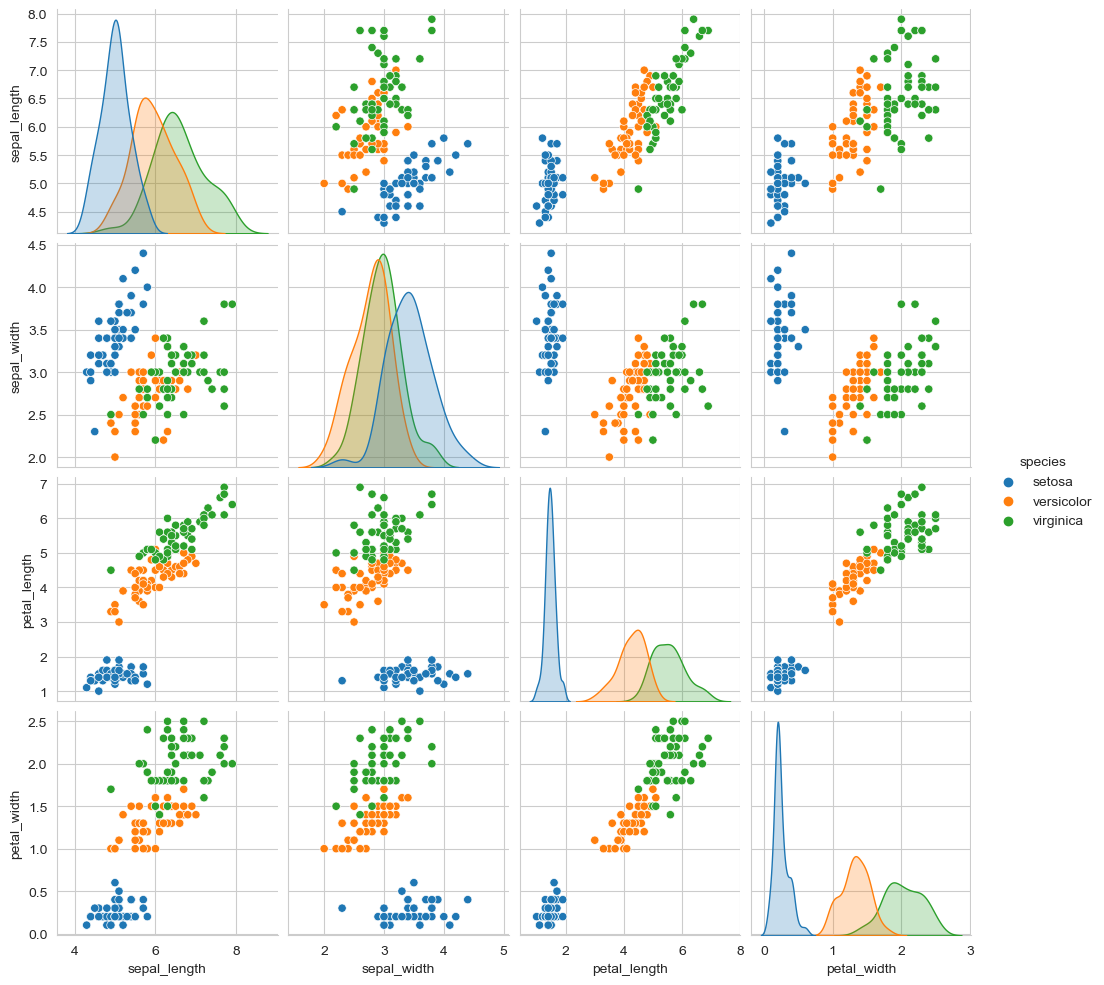

In [13]:
sns.pairplot(iris_sns)
sns.pairplot(iris_sns, hue='species')

#### 均值

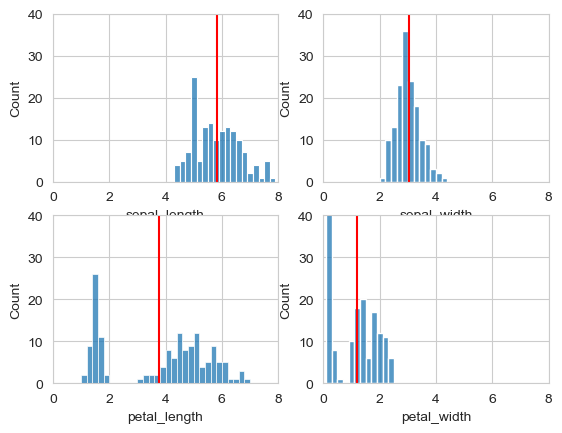

In [16]:
# Bk3_Ch21_1_B

fig, axes = plt.subplots(2, 2)

mu_1 = iris_sns['sepal_length'].mean()
sns.histplot(data=iris_sns, x='sepal_length', binwidth=0.2, ax=axes[0][0])
axes[0][0].set_xlim([0, 8]);
axes[0][0].set_ylim([0, 40])
axes[0][0].vlines(x=mu_1, ymin=0, ymax=40, color='r')

mu_2 = iris_sns['sepal_width'].mean()
sns.histplot(data=iris_sns, x='sepal_width', binwidth=0.2, ax=axes[0][1])
axes[0][1].set_xlim([0, 8]);
axes[0][1].set_ylim([0, 40])
axes[0][1].vlines(x=mu_2, ymin=0, ymax=40, color='r')

mu_3 = iris_sns['petal_length'].mean()
sns.histplot(data=iris_sns, x='petal_length', binwidth=0.2, ax=axes[1][0])
axes[1][0].set_xlim([0, 8]);
axes[1][0].set_ylim([0, 40])
axes[1][0].vlines(x=mu_3, ymin=0, ymax=40, color='r')

mu_4 = iris_sns['petal_width'].mean()
sns.histplot(data=iris_sns, x='petal_width', binwidth=0.2, ax=axes[1][1])
axes[1][1].set_xlim([0, 8]);
axes[1][1].set_ylim([0, 40])
axes[1][1].vlines(x=mu_4, ymin=0, ymax=40, color='r')

#### 标准差

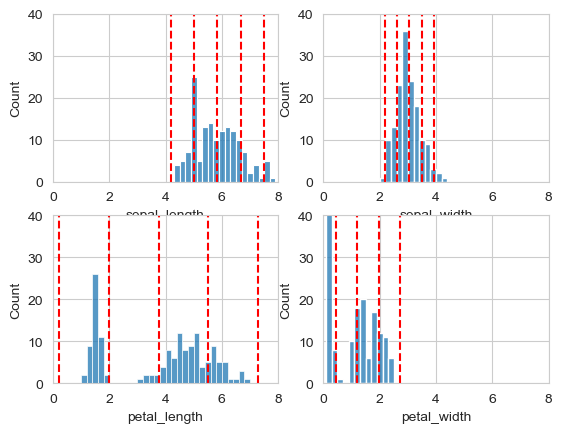

In [17]:
# Bk3_Ch21_1_C

num = 0
fig, axes = plt.subplots(2, 2)
for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=iris_sns, x=iris_sns.columns[num], binwidth=0.2, ax=axes[i][j])
        
        axes[i][j].set_xlim([0, 8]);
        axes[i][j].set_ylim([0, 40])

        mu = iris_sns.iloc[:, num].mean()
        std = iris_sns.iloc[:, num].std()

        axes[i][j].axvline(x=mu, color='r', linestyle='--')
        axes[i][j].axvline(x=mu - std, color='r', linestyle='--')
        axes[i][j].axvline(x=mu + std, color='r', linestyle='--')
        axes[i][j].axvline(x=mu - 2 * std, color='r', linestyle='--')
        axes[i][j].axvline(x=mu + 2 * std, color='r', linestyle='--')
        
        num = num + 1

#### 协方差矩阵

Text(0.5, 1.0, '$\\Sigma$')

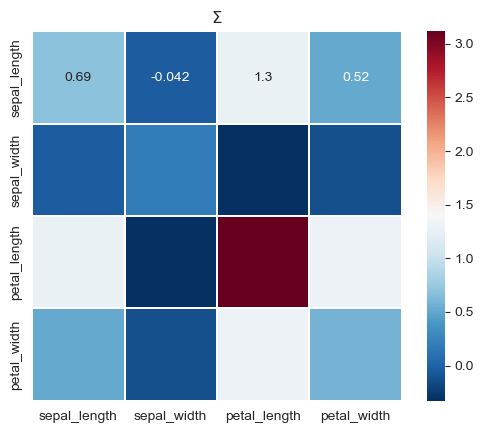

In [21]:
# Bk3_Ch21_1_D

# 在计算协方差矩阵之前删除 'species' 列
iris_sns_numeric = iris_sns.drop('species', axis=1)

# 计算整个数据集的协方差矩阵
SIGMA = iris_sns_numeric.cov()


fig, axs = plt.subplots()

# 绘制热图
h = sns.heatmap(SIGMA, cmap='RdBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('$\Sigma$')


Text(0.5, 1.0, 'Y = 2, virginica')

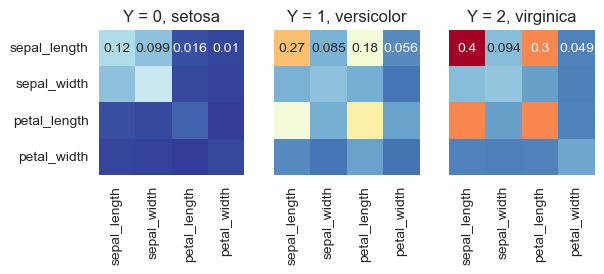

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(iris_sns_numeric.loc[iris_sns['species'] == 'setosa'].cov(),
                 cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(iris_sns_numeric.loc[iris_sns['species'] == 'versicolor'].cov(),
                 cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(iris_sns_numeric.loc[iris_sns['species'] == 'virginica'].cov(),
                 cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)
ax3.set_title('Y = 2, virginica')


#### 相关性系数

Text(0.5, 1.0, '$Ρ$')

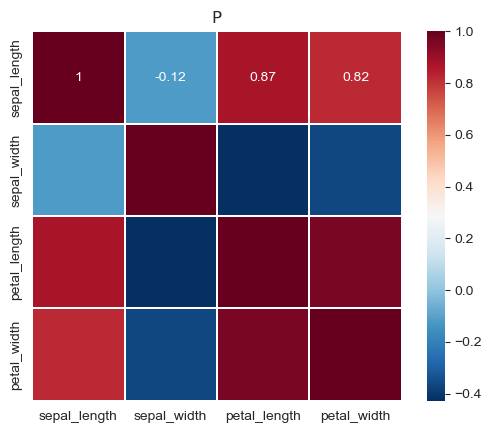

In [23]:
# Bk3_Ch21_1_E

RHO = iris_sns_numeric.corr()

fig, axs = plt.subplots()

h = sns.heatmap(RHO, cmap='RdBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('$\u03A1$')


Text(0.5, 1.0, 'Y = 2, virginica')

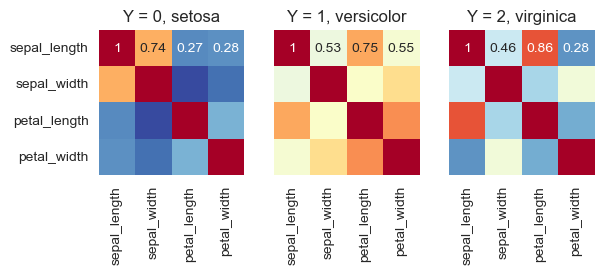

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(iris_sns_numeric.loc[iris_sns['species'] == 'setosa'].corr(),
                 cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0.15)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(iris_sns_numeric.loc[iris_sns['species'] == 'versicolor'].corr(),
                 cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0.15)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(iris_sns_numeric.loc[iris_sns['species'] == 'virginica'].corr(),
                 cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0.15)
ax3.set_title('Y = 2, virginica')